In [225]:
#Import packages
import pandas as pd
import numpy as np
import datetime as dt

In [92]:
#Import datasets using read_csv function 
dailyIntensity = pd.read_csv(r"C:\Users\fabia\Downloads\fitbit fitness tracker data\dailyIntensities_merged.csv")
weightLog = pd.read_csv(r"C:\Users\fabia\Downloads\fitbit fitness tracker data\weightLogInfo_merged.csv")
dailySteps = pd.read_csv(r"C:\Users\fabia\Downloads\fitbit fitness tracker data\dailySteps_merged.csv")
dailyCalories =pd.read_csv(r"C:\Users\fabia\Downloads\fitbit fitness tracker data\dailyCalories_merged.csv")

In [178]:
#Preview of dailyIntensity dataset
dailyIntensity.head(5)

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,DayOfTheWeek,TotalMins,TotalHours,TotalDistance
0,1503960366,2016-04-12,728,328,13,25,0.0,6.06,0.55,1.88,Tuesday,1094,18.0,8.49
1,1503960366,2016-04-13,776,217,19,21,0.0,4.71,0.69,1.57,Wednesday,1033,17.0,6.97
2,1503960366,2016-04-14,1218,181,11,30,0.0,3.91,0.40,2.44,Thursday,1440,24.0,6.75
3,1503960366,2016-04-15,726,209,34,29,0.0,2.83,1.26,2.14,Friday,998,17.0,6.23
4,1503960366,2016-04-16,773,221,10,36,0.0,5.04,0.41,2.71,Saturday,1040,17.0,8.16


In [179]:
#Preview of weightLog dataset
weightLog.head(5)

,Id,Date,BMI,IsManualReport,LogId
0,1503960366,2016-05-02,22.650000,1,1462233599000
1,1503960366,2016-05-03,22.650000,1,1462319999000
2,1927972279,2016-04-13,47.540001,0,1460509732000
3,2873212765,2016-04-21,21.450001,1,1461283199000
4,2873212765,2016-05-12,21.690001,1,1463097599000


In [180]:
#Preview of dailySteps dataset
dailySteps.head(5)

,Id,ActivityDay,StepTotal
0,1503960366,2016-04-12,13162
1,1503960366,2016-04-13,10735
2,1503960366,2016-04-14,10460
3,1503960366,2016-04-15,9762
4,1503960366,2016-04-16,12669


In [229]:
#Preview of dailyCalories dataset
dailyCalories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [97]:
#Check if there are any null or missing values
missing_values_weightLog = weightLog.isnull().sum()
missing_values_weightLog[:]


Id                 0
Date               0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [98]:
#There are 67 rows on weightLog table and 65 are null,therefore I cant use it.
del weightLog["Fat"]


In [181]:
missing_values_dailyIntensity = dailyIntensity.isnull().sum()
missing_values_dailyIntensity[:]

Id                          0
ActivityDay                 0
SedentaryMinutes            0
LightlyActiveMinutes        0
FairlyActiveMinutes         0
VeryActiveMinutes           0
SedentaryActiveDistance     0
LightActiveDistance         0
ModeratelyActiveDistance    0
VeryActiveDistance          0
DayOfTheWeek                0
TotalMins                   0
TotalHours                  0
TotalDistance               0
dtype: int64

In [182]:
missing_values_dailySteps = dailySteps.isnull().sum()
missing_values_dailySteps[:]

Id             0
ActivityDay    0
StepTotal      0
dtype: int64

In [183]:
dailyIntensity.info()
#ActivityDay is Dtype object but should be datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDay               940 non-null    datetime64[ns]
 2   SedentaryMinutes          940 non-null    int64         
 3   LightlyActiveMinutes      940 non-null    int64         
 4   FairlyActiveMinutes       940 non-null    int64         
 5   VeryActiveMinutes         940 non-null    int64         
 6   SedentaryActiveDistance   940 non-null    float64       
 7   LightActiveDistance       940 non-null    float64       
 8   ModeratelyActiveDistance  940 non-null    float64       
 9   VeryActiveDistance        940 non-null    float64       
 10  DayOfTheWeek              940 non-null    object        
 11  TotalMins                 940 non-null    int64         
 12  TotalHours            

In [184]:
weightLog.info()
#Date is also Dtype object and needs to be converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   BMI             67 non-null     float64       
 3   IsManualReport  67 non-null     int32         
 4   LogId           67 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2)
memory usage: 2.5 KB


In [185]:
#Find how many unique members I have 
uniqueId = len(pd.unique(dailyIntensity["Id"]))
  
print("# of unique Id: " + str(uniqueId))

# of unique Id: 33


In [186]:
#convert "ActivityDay" to datetime type
dailyIntensity["ActivityDay"] = pd.to_datetime(dailyIntensity["ActivityDay"], format="%m/%d/%Y")

In [187]:
#Verify it was changed
dailyIntensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDay               940 non-null    datetime64[ns]
 2   SedentaryMinutes          940 non-null    int64         
 3   LightlyActiveMinutes      940 non-null    int64         
 4   FairlyActiveMinutes       940 non-null    int64         
 5   VeryActiveMinutes         940 non-null    int64         
 6   SedentaryActiveDistance   940 non-null    float64       
 7   LightActiveDistance       940 non-null    float64       
 8   ModeratelyActiveDistance  940 non-null    float64       
 9   VeryActiveDistance        940 non-null    float64       
 10  DayOfTheWeek              940 non-null    object        
 11  TotalMins                 940 non-null    int64         
 12  TotalHours            

In [188]:
# Convert "Date" to datetime type
weightLog["Date"] = pd.to_datetime(weightLog["Date"], format="%m/%d/%Y")

# Convert "IsManualReport" from boolean to 0's and 1's
weightLog["IsManualReport"] = weightLog["IsManualReport"].astype(int)

In [189]:
weightLog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   BMI             67 non-null     float64       
 3   IsManualReport  67 non-null     int32         
 4   LogId           67 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2)
memory usage: 2.5 KB


In [108]:
#Convert ActivityDay column to datetime
dailySteps["ActivityDay"] = pd.to_datetime(dailySteps["ActivityDay"], format="%m/%d/%Y")

In [190]:
dailySteps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Id           940 non-null    int64         
 1   ActivityDay  940 non-null    datetime64[ns]
 2   StepTotal    940 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 22.2 KB


In [110]:
# create new column "DayOfTheWeek" to represent day of the week 
dailyIntensity["DayOfTheWeek"] = dailyIntensity["ActivityDay"].dt.day_name()

# print 1st 5 rows to confirm
dailyIntensity["DayOfTheWeek"].head(5)

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayOfTheWeek, dtype: object

In [191]:
# Create new column "TotalMins" containing sum of total minutes. This will tell us for how long these people wore their fitbit
dailyIntensity["TotalMins"] = dailyIntensity["VeryActiveMinutes"] + dailyIntensity["FairlyActiveMinutes"] + dailyIntensity["LightlyActiveMinutes"] + dailyIntensity["SedentaryMinutes"]
# Create new column "TotalHours" containing total minutes/60
dailyIntensity["TotalHours"] = round(dailyIntensity["TotalMins"]/60)

#Create new column "TotalDistance" containing sum of total distance
dailyIntensity["TotalDistance"] = dailyIntensity["VeryActiveDistance"] + dailyIntensity["ModeratelyActiveDistance"] + dailyIntensity["LightActiveDistance"] + dailyIntensity["SedentaryActiveDistance"]


In [192]:
dailyIntensity.head(5)

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,DayOfTheWeek,TotalMins,TotalHours,TotalDistance
0,1503960366,2016-04-12,728,328,13,25,0.0,6.06,0.55,1.88,Tuesday,1094,18.0,8.49
1,1503960366,2016-04-13,776,217,19,21,0.0,4.71,0.69,1.57,Wednesday,1033,17.0,6.97
2,1503960366,2016-04-14,1218,181,11,30,0.0,3.91,0.40,2.44,Thursday,1440,24.0,6.75
3,1503960366,2016-04-15,726,209,34,29,0.0,2.83,1.26,2.14,Friday,998,17.0,6.23
4,1503960366,2016-04-16,773,221,10,36,0.0,5.04,0.41,2.71,Saturday,1040,17.0,8.16


In [193]:
#Merge dailyIntensity dataframe and dailySteps 
#Merge the new dataframe with weightLog to have all data in one table
intensityAndSteps = dailyIntensity.merge(dailySteps)
dailyActivity = intensityAndSteps.merge(weightLog)
dailyActivity.head(5)

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,DayOfTheWeek,TotalMins,TotalHours,TotalDistance,StepTotal,Date,BMI,IsManualReport,LogId
0,1503960366,2016-04-12,728,328,13,25,0.0,6.06,0.55,1.88,Tuesday,1094,18.0,8.49,13162,2016-05-02,22.65,1,1462233599000
1,1503960366,2016-04-12,728,328,13,25,0.0,6.06,0.55,1.88,Tuesday,1094,18.0,8.49,13162,2016-05-03,22.65,1,1462319999000
2,1503960366,2016-04-13,776,217,19,21,0.0,4.71,0.69,1.57,Wednesday,1033,17.0,6.97,10735,2016-05-02,22.65,1,1462233599000
3,1503960366,2016-04-13,776,217,19,21,0.0,4.71,0.69,1.57,Wednesday,1033,17.0,6.97,10735,2016-05-03,22.65,1,1462319999000
4,1503960366,2016-04-14,1218,181,11,30,0.0,3.91,0.40,2.44,Thursday,1440,24.0,6.75,10460,2016-05-02,22.65,1,1462233599000


In [227]:
dailyActivity.describe()

,Id,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,TotalMins,TotalHours,TotalDistance,StepTotal,BMI,IsManualReport,LogId
count,2.076000e+03,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2.076000e+03
mean,7.009972e+09,887.837669,240.820809,14.445087,37.634393,0.005039,4.700819,0.658979,3.304167,1180.737958,19.707129,8.669003,11648.384393,25.183868,0.612235,1.461772e+12
std,1.936390e+09,256.550949,72.954950,12.961681,35.011513,0.019061,1.809907,0.686102,4.416190,264.360735,4.385075,5.389695,5692.236146,3.044828,0.487358,7.772601e+08
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,21.450001,0.000000,1.460444e+12
25%,6.962181e+09,680.000000,210.750000,4.000000,7.000000,0.000000,3.610000,0.080000,0.137500,977.000000,16.000000,5.357500,7948.000000,23.959999,0.000000,1.461048e+12
50%,6.962181e+09,837.000000,235.500000,12.000000,29.000000,0.000000,4.660000,0.410000,1.740000,1074.000000,18.000000,7.405000,10762.000000,24.389999,1.000000,1.461802e+12
75%,8.877689e+09,1122.250000,288.000000,22.000000,61.000000,0.000000,5.890000,1.070000,3.900000,1440.000000,24.000000,9.560000,13928.000000,25.559999,1.000000,1.462406e+12
max,8.877689e+09,1440.000000,448.000000,74.000000,210.000000,0.110000,10.710000,2.390000,21.660000,1440.000000,24.000000,26.670000,29326.000000,47.540001,1.000000,1.463098e+12


In [195]:
weightLog.describe()

,Id,BMI,IsManualReport,LogId
count,6.700000e+01,67.000000,67.000000,6.700000e+01
mean,7.009282e+09,25.185224,0.611940,1.461772e+12
std,1.950322e+09,3.066963,0.490986,7.829948e+08
min,1.503960e+09,21.450001,0.000000,1.460444e+12
25%,6.962181e+09,23.959999,0.000000,1.461079e+12
50%,6.962181e+09,24.389999,1.000000,1.461802e+12
75%,8.877689e+09,25.559999,1.000000,1.462375e+12
max,8.877689e+09,47.540001,1.000000,1.463098e+12


In [196]:
dailyCalories.describe()

,Id,Calories
count,9.400000e+02,940.000000
mean,4.855407e+09,2303.609574
std,2.424805e+09,718.166862
min,1.503960e+09,0.000000
25%,2.320127e+09,1828.500000
50%,4.445115e+09,2134.000000
75%,6.962181e+09,2793.250000
max,8.877689e+09,4900.000000


In [223]:
# Import matplotlib package
import matplotlib.pyplot as plt

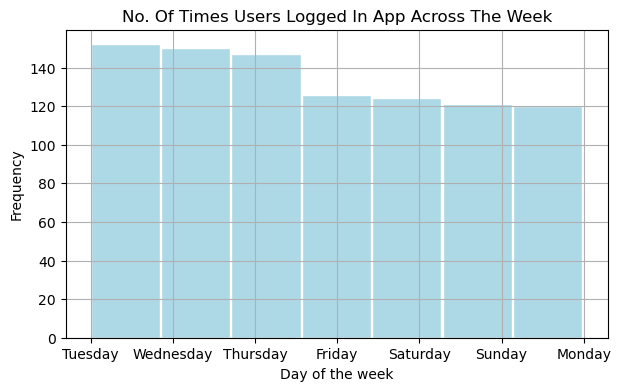

In [205]:
# Plotting histogram
plt.style.use("default")
plt.figure(figsize=(7,4)) # specify size of the chart
plt.hist(dailyIntensity.DayOfTheWeek, bins = 7, 
         width = 0.84, color = "lightblue", edgecolor = "white")

# Adding labels
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. Of Times Users Logged In App Across The Week")
plt.grid(True)
plt.show()

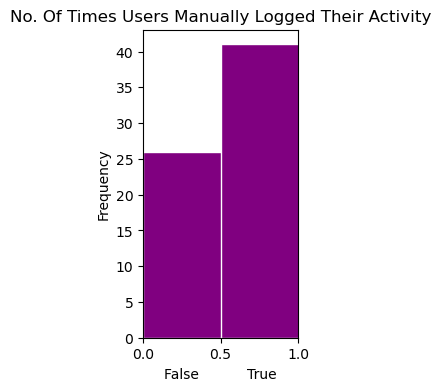

In [120]:
#Plotting histogram
plt.style.use("default")
plt.figure(figsize=(2,4)) # specify size of the chart
plt.hist(weightLog.IsManualReport, bins = 2, 
         width = 0.8, color = "purple", edgecolor = "white")
plt.xlim(0, 1)

# Adding labels
plt.xlabel("False           True")
plt.ylabel("Frequency")
plt.title("No. Of Times Users Manually Logged Their Activity")
plt.show()

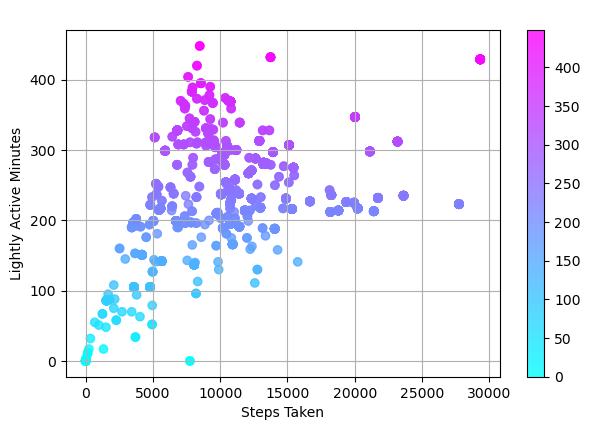

In [217]:
# Plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(7,4.5)) # specify size of the chart
plt.scatter(dailyActivity.StepTotal, dailyActivity.LightlyActiveMinutes, 
            alpha = 0.8, c = dailyActivity.LightlyActiveMinutes, 
            cmap = "cool")
# Add annotations and visuals
plt.colorbar(orientation = "vertical")
plt.xlabel("Steps Taken")
plt.ylabel("Lightly Active Minutes")
plt.title(" ")

plt.grid(True)
plt.show()

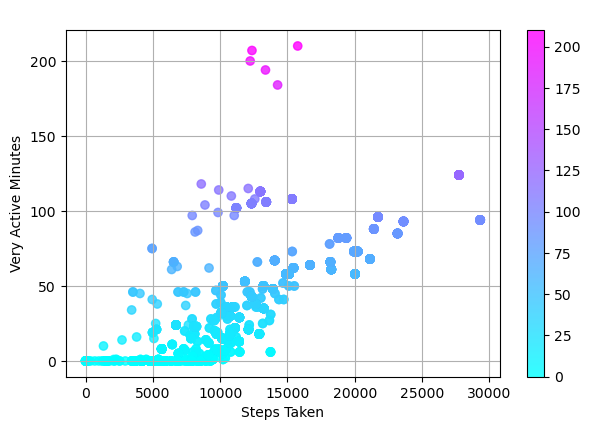

In [220]:
# Plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(7,4.5)) # specify size of the chart
plt.scatter(dailyActivity.StepTotal, dailyActivity.VeryActiveMinutes, 
            alpha = 0.8, c = dailyActivity.VeryActiveMinutes, 
            cmap = "cool")

# Add annotations and visuals
plt.colorbar(orientation = "vertical")
plt.xlabel("Steps Taken")
plt.ylabel("Very Active Minutes")
plt.title(" ")

plt.grid(True)
plt.show()

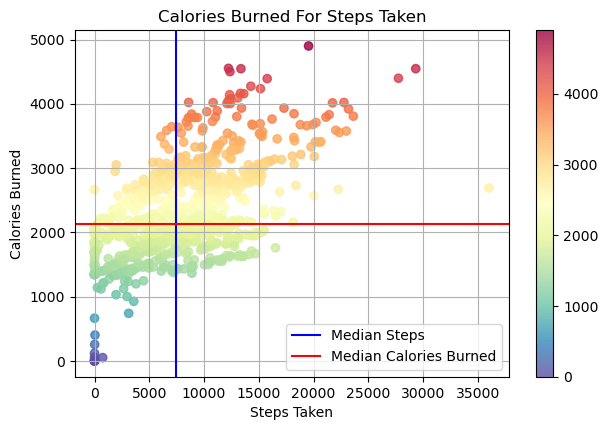

In [232]:
# Plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(7,4.5)) # specify size of the chart
plt.scatter(dailySteps.StepTotal, dailyCalories.Calories, 
            alpha = 0.8, c = dailyCalories.Calories, 
            cmap = "Spectral_r")

# Adding annotations and visuals
median_calories = 2134
median_steps = 7405

plt.colorbar(orientation = "vertical")
#Adding lines to find median steps and median calories burned
plt.axvline(median_steps, color = "Blue", label = "Median Steps")
plt.axhline(median_calories, color = "Red", label = "Median Calories Burned")
plt.xlabel("Steps Taken")
plt.ylabel("Calories Burned")
plt.title("Calories Burned For Steps Taken")
plt.grid(True)
plt.legend()
plt.show()

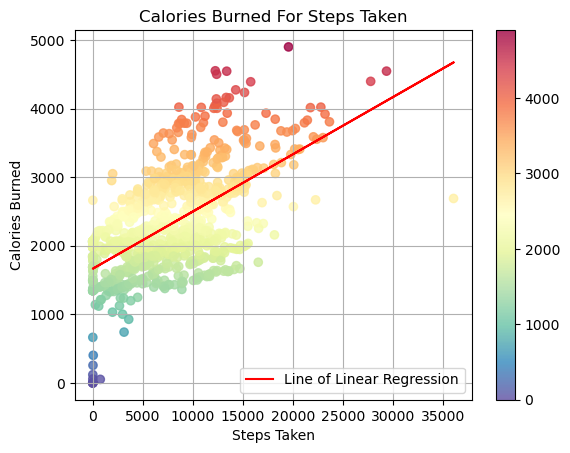

In [238]:
#Import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

#Assigning "StepTotal" and "Calories" columns to x and y
x = dailySteps["StepTotal"]
y = dailyCalories["Calories"]

#Creating linear regression line
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

#Adding annotations and visuals
plt.scatter(x, y, alpha = 0.8, c = y, 
            cmap = "Spectral_r")
plt.plot(x, mymodel, color ="red", label = "Line of Linear Regression")
plt.colorbar(orientation = "vertical")
plt.xlabel("Steps Taken")
plt.ylabel("Calories Burned")
plt.title("Calories Burned For Steps Taken")
plt.grid(True)
plt.legend()
plt.show()

In [161]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [162]:
#Creating training and testing data
training_data = dailyActivity.sample(frac=0.8, random_state=25)
testing_data = dailyActivity.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")


No. of training examples: 1661
No. of testing examples: 415


In [200]:
training_data.describe(include ="all", datetime_is_numeric=True)

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,DayOfTheWeek,TotalMins,TotalHours,TotalDistance,StepTotal,Date,BMI,IsManualReport,LogId
count,1.661000e+03,1661,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661,1661.000000,1661.000000,1661.000000,1661.000000,1661,1661.000000,1661.000000,1.661000e+03
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.041403e+09,2016-04-27 01:11:05.382299904,883.940999,241.063817,14.492474,37.956051,0.005316,4.709837,0.663727,3.344919,NaN,1177.453341,19.652619,8.723799,11709.785671,2016-04-26 22:09:01.842263552,25.123883,0.613486,1.461771e+12
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,0.000000,0.000000,0.000000,2016-04-12 00:00:00,21.450001,0.000000,1.460444e+12
25%,6.962181e+09,2016-04-19 00:00:00,680.000000,212.000000,4.000000,7.000000,0.000000,3.610000,0.100000,0.120000,NaN,977.000000,16.000000,5.350000,7937.000000,2016-04-19 00:00:00,23.959999,0.000000,1.461048e+12
50%,6.962181e+09,2016-04-27 00:00:00,837.000000,236.000000,12.000000,30.000000,0.000000,4.690000,0.410000,1.740000,NaN,1073.000000,18.000000,7.410000,10762.000000,2016-04-27 00:00:00,24.389999,1.000000,1.461802e+12
75%,8.877689e+09,2016-05-05 00:00:00,1122.000000,288.000000,22.000000,62.000000,0.000000,5.890000,1.080000,3.900000,NaN,1440.000000,24.000000,9.560000,13928.000000,2016-05-04 00:00:00,25.559999,1.000000,1.462406e+12
max,8.877689e+09,2016-05-12 00:00:00,1440.000000,448.000000,74.000000,207.000000,0.110000,10.710000,2.390000,21.660000,NaN,1440.000000,24.000000,26.670000,29326.000000,2016-05-12 00:00:00,47.540001,1.000000,1.463098e+12


In [201]:
testing_data.describe(include = "all",datetime_is_numeric=True)

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,DayOfTheWeek,TotalMins,TotalHours,TotalDistance,StepTotal,Date,BMI,IsManualReport,LogId
count,4.150000e+02,415,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415,415.000000,415.000000,415.000000,415.000000,415,415.000000,415.000000,4.150000e+02
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.884174e+09,2016-04-26 18:23:25.301204992,903.433735,239.848193,14.255422,36.346988,0.003928,4.664723,0.639976,3.141060,NaN,1193.884337,19.925301,8.449687,11402.631325,2016-04-26 23:01:00.722891776,25.423952,0.607229,1.461774e+12
min,1.503960e+09,2016-04-12 00:00:00,127.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,240.000000,4.000000,0.000000,0.000000,2016-04-12 00:00:00,21.450001,0.000000,1.460444e+12
25%,6.962181e+09,2016-04-19 00:00:00,686.000000,210.000000,3.500000,7.000000,0.000000,3.650000,0.070000,0.235000,NaN,977.000000,16.000000,5.490000,8064.000000,2016-04-19 12:00:00,23.959999,0.000000,1.461123e+12
50%,6.962181e+09,2016-04-27 00:00:00,862.000000,232.000000,12.000000,24.000000,0.000000,4.550000,0.410000,1.490000,NaN,1098.000000,18.000000,7.340000,10742.000000,2016-04-27 00:00:00,25.290001,1.000000,1.461802e+12
75%,8.877689e+09,2016-05-05 00:00:00,1123.000000,290.500000,21.000000,58.000000,0.000000,5.810000,0.985000,3.660000,NaN,1440.000000,24.000000,9.175000,13422.000000,2016-05-04 00:00:00,25.590000,1.000000,1.462345e+12
max,8.877689e+09,2016-05-12 00:00:00,1440.000000,432.000000,72.000000,210.000000,0.110000,10.710000,2.390000,21.660000,NaN,1440.000000,24.000000,26.670000,29326.000000,2016-05-12 00:00:00,47.540001,1.000000,1.463098e+12


In [202]:
dailyActivity.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,DayOfTheWeek,TotalMins,TotalHours,TotalDistance,StepTotal,Date,BMI,IsManualReport,LogId
0,1503960366,2016-04-12,728,328,13,25,0.0,6.06,0.55,1.88,Tuesday,1094,18.0,8.49,13162,2016-05-02,22.65,1,1462233599000
1,1503960366,2016-04-12,728,328,13,25,0.0,6.06,0.55,1.88,Tuesday,1094,18.0,8.49,13162,2016-05-03,22.65,1,1462319999000
2,1503960366,2016-04-13,776,217,19,21,0.0,4.71,0.69,1.57,Wednesday,1033,17.0,6.97,10735,2016-05-02,22.65,1,1462233599000
3,1503960366,2016-04-13,776,217,19,21,0.0,4.71,0.69,1.57,Wednesday,1033,17.0,6.97,10735,2016-05-03,22.65,1,1462319999000
4,1503960366,2016-04-14,1218,181,11,30,0.0,3.91,0.40,2.44,Thursday,1440,24.0,6.75,10460,2016-05-02,22.65,1,1462233599000


In [169]:
#Select columns and create dummies

predictors = ["SedentaryMinutes",
              "LightlyActiveMinutes",  
              "FairlyActiveMinutes",  
              "VeryActiveMinutes",  
              "StepTotal"]

X_train = pd.get_dummies(training_data[predictors],
               drop_first=True)
y_train = training_data["IsManualReport"]

X_test = pd.get_dummies(testing_data[predictors],
               drop_first=True)

In [170]:
#Replace missing values with the means from the training data.

train_means = X_train.mean()

X_train = X_train.fillna(train_means)
X_test = X_test.fillna(train_means)

In [171]:
#Fit logistic regression model and calculate accuracy using the train data.

my_lr = LogisticRegression(max_iter=400).fit(X_train, y_train)
lr_pred_train = my_lr.predict(X_train)
metrics.accuracy_score(y_train, lr_pred_train)

0.8832028898254064

In [172]:
#Create confusion matrix.
metrics.confusion_matrix(y_train, lr_pred_train)
metrics.confusion_matrix(y_train, lr_pred_train,normalize="true")
pd.DataFrame(metrics.confusion_matrix(y_train,lr_pred_train,normalize="true"))

,0,1
0,0.862928,0.137072
1,0.104024,0.895976


In [173]:
#Make predictions using test data.
lr_pred_test = my_lr.predict(X_test)

In [174]:
#Format predictions for output and write to csv.

lr_output = pd.DataFrame(lr_pred_test,
                      index=X_test.index,
                      columns=["IsManualReport"])
lr_output.to_csv("lr_pred.csv")

In [175]:
#Fit decision tree model and calculate accuracy on the train data.

my_tree = DecisionTreeClassifier().fit(X_train, y_train)
tree_pred_train = my_tree.predict(X_train)
metrics.accuracy_score(y_train, tree_pred_train)

0.9987959060806743

In [176]:
#Create confusion matrix for the train data.

pd.DataFrame(metrics.confusion_matrix(y_train, tree_pred_train, normalize="true"))

,0,1
0,1.000000,0.000000
1,0.001963,0.998037


In [177]:
#Make predictions using test data

tree_pred_test = my_tree.predict(X_test)

In [ ]:
#Format predictions for output and write to csv.

tree_output = pd.DataFrame(tree_pred_test,
                      index=X_test.index,
                      columns=["Survived"])
tree_output.to_csv("tree_pred.csv")

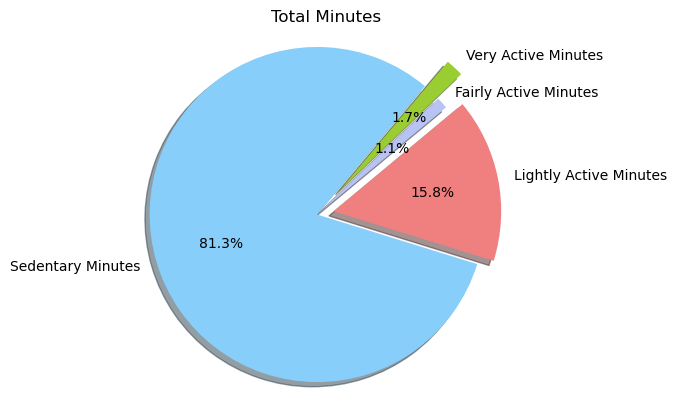

In [35]:
# Adding up the minutes in each category to create pie chart
sedentary = dailyActivity["SedentaryMinutes"].sum()
lightlyActive = dailyActivity["LightlyActiveMinutes"].sum()
fairlyActive = dailyActivity["FairlyActiveMinutes"].sum()
veryActive = dailyActivity["VeryActiveMinutes"].sum()

#Adding annotations and visuals
my_data = [sedentary, lightlyActive, fairlyActive, veryActive]
my_labels = "Sedentary Minutes", "Lightly Active Minutes", "Fairly Active Minutes", "Very Active Minutes"
my_colors = ["lightskyblue", "lightcoral", "#B7C3F3","yellowgreen"]
my_explode = (0, 0.1, 0,0.2)
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%', startangle=50, shadow=True, colors=my_colors, explode=my_explode)
plt.title('Total Minutes')
plt.axis('equal')
plt.show()